# Trabalho 1


## Otimização sem restrição
Um problema de otimização sem restrições diz respeito a obtenção do mínimo ou máximo local $x^*$ de uma função objetivo $f(x) ; f: \mathbb{R}^n \rightarrow \mathbb{R}$

\begin{equation}
  {min f(x)}_{x} \in \mathbb{R}^n
\end{equation}

#### Vetor gradiente

O gradiente é um vetor que aponta na direção de maior crescimento de uma função. No contexto da otimização, ele é utilizado para encontrar a direção de menor crescimento da função objetivo, que é a direção oposta a do gradiente.

$$f_x=\frac{\partial f(x)}{\partial x} = \frac{\partial f(x) }{\partial x_1}, \frac{\partial f(x) }{\partial x_2}, \frac{\partial f(x)}{\partial x_m} $$

#### Matriz hessiana

Matriz que contêm informações sobre a curvatura da função objetivo. É usado para determinar se um ponto é um mínimo ou máximo local.

$$ (f_{xx})_{ij} = \frac{\partial^2 f(x)}{\partial x_i \partial x_j} $$

- $x^*$ é míninmo se $f_{xx} > 0$
- $x^*$ é máximo se $f_{xx} < 0$


#### Série de Taylor
É utilizada para aproximar funções complicadas por meio de funções polinomiais mais simples. É uma representação matemática de uma função como uma soma de inifinitos termos.

$$ T(f, a, x)=\sum_{n=0}^{\infty}\frac{f^n(a)}{n!}(x-a)n $$

- Expansão da série de Taylor em função do vetor gradiente  e da matriz Hessiana
$$ f(x) = f(x_0)= (\frac{\partial f}{\partial x})^T(x-x_0)+ \frac{1}{2}(x-x_0)^T(\frac{\partial^2f}{\partial x^2})(x-x_0)+O(3) $$



# Parte 01: Otimização analítica

**Encontrar Analiticamente $x^{*} \in \mathbb{R}^2$ que minimize $J(x) = (x - C)^{T} A(x-C) + b$ e $J(x^*)$**

$x$ : Vetor de $n$ variáveis $x=[x_1, x_2, ..., x_n]$

$A$ : Matriz simétrica $n \times n$ que define os termos  da superfície

$C$ : Vetor $n \times 1$ que define os termos lineares da superfície

Se $Q$ for uma matriz simétrica, o cálculo do  gradiente de $J(x)$, pode ser feito através da propiedade matricial definida no apêndice A.4-17 (Lewis, 2012):

$$\frac{\partial}{\partial x} (x - C)^TA(x-C) = 2A(x-C)$$

Para minimizar a função, encontramos o ponto crítico:
$$ 2A(x-C) = 0 \Rightarrow 2Ax = 2AC \therefore x^* = C$$

E o Hessiano que indica um ponto mínimo:
$$J_{xx} = 2A$$

Além disso, $J(x^*)$ pode ser obtido substituindo o valor de $x^*$ na equação inicial:

$$J(x^*) = (C - C)^TA(C-C) + b = b$$

Admitindo valores númericos para obtenção do gráfico, $Q = \begin{bmatrix}
 2 & 0.5 \\
 0.5 & 1
\end{bmatrix}$   , b = 5 e  $C^T = \begin{bmatrix}1 & 2\end{bmatrix}$

$$ x^* = C ⇒ x^* = \begin{bmatrix}1 \\ 2\end{bmatrix} $$

$$J(x^*) = b = 5$$













    
    

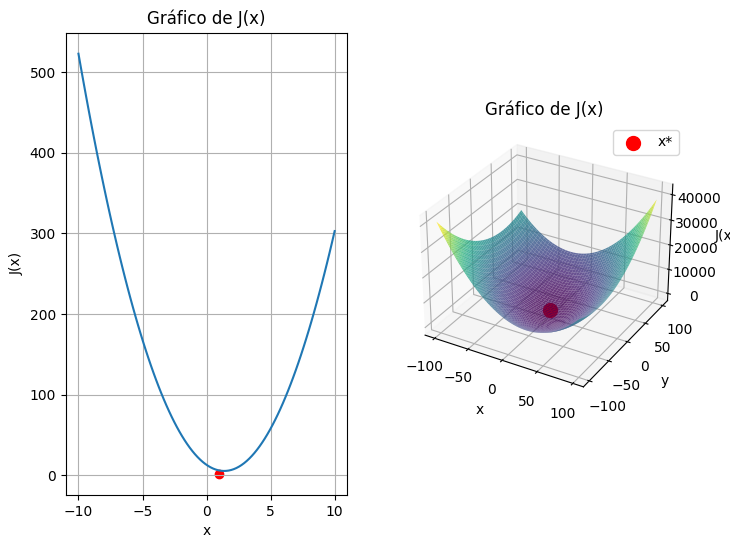

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


C = np.array([1, 2])
A = np.array([[2, 0.5],
              [0.5, 1]])
b = 5

#    @brief: Retorna a função que define a superfície
def J(x):
    return (np.dot((x-C).T, np.dot(A, (x-C))) + b)

#   @brief: Plota o gráfico de J(x)
def PlotCurve(fig):
    ax = fig.add_subplot(1, 2, 1)
    x = np.linspace(-10, 10, 100)
    y = GetCurve(x)
    ax.plot(x, y)
    ax.scatter(C[0], C[1], color='red', label='x*')
    ConfGraph2D(ax, 'x', 'J(x)', 'Gráfico de J(x)')

#   @brief: Define os valores de y = J(x)
def GetCurve(x):
    y = []
    for item in x:
      y.append(J(item))
    return (y)

def ConfGraph2D(ax, x, y, title):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)
    ax.grid(True)


#    @brief: Plota a superfície definida por J(x)
#    - add_subplot(): Cria uma "subimagem" dentro da figura
#    - plot_surface(): plota uma superfície 3D na figura (cmap=paletaDeCores)
def PlotSurface(fig):
    XYZ = GetSurface()
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(XYZ[0], XYZ[1], XYZ[2], cmap='viridis', alpha=0.8)
    GetOptimalX(ax)
    ConfGraph3D(ax, 'x', 'y', 'J(x)', 'Gráfico de J(x)')

#    @brief: Cria malha de pontos para plotar a superfície quadrática
#        - linspace(): retorna conjunto de números uniformemente espaçados
#        - meshgrid(): retorna matrizes de coordenadas a partir de vetores 1D
#        - zeros(): retorna um array do tamanho passado como pârametro
#        - x: vetor que representa as coordenadas x e y do ponto atual da malha
def GetSurface():
    X, Y = np.meshgrid(np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
    Z = np.zeros(X.shape)
    for line in range(len(X)):
        for column in range (len(Y)):
            x = np.array([X[line, column], Y[line, column]])
            Z[line, column] = J(x)
    return(np.array([X, Y, Z]))

def GetOptimalX(ax):
    optimalX = C
    ax.scatter(optimalX[0], optimalX[1], J(optimalX), color='red', s=100, label='x*')

def ConfGraph3D(ax, x, y, z, title):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(title)
    plt.legend()

def PlotFigure():
    fig = plt.figure(figsize=(8, 6))
    PlotCurve(fig)
    PlotSurface(fig)

PlotFigure()


# Parte 02: Otimização númerica por descida de gradiente

 **Definir matrizes (ou vetores) $A$, $b$ e $C$. Encontrar numericamente por descida de gradiente $x^* \in \mathbb{R}$ que minimize $J(x) = (x-C)^TA(x-C) + b$ e $J(x^*)$ com diferente valores $\alpha$ constantes. Avalia a influência de $ \alpha$ no processo de otmização e mostrar os resultados no paraboloide de revolução resultante na equação**

### Desenvolvendo analiticamente o algoritmo de descida de gradiente

 O algoritmo iterativo de descida de gradiente pode ser obtido considerando uma aproximação de 1º ordem da série de Taylor em função do vetor gradiente e da matriz Hessiana $dJ(x) = J_x^Tdx$. O objetivo é obter $x$ tal que $\frac{dJ(x)}{dx} = 0 $. Por ser um metódo computacional, substitui-se $d$ por $\Delta$ e concluimos que:

  $$ \Delta J(x) \cong J_x^T \Delta x $$

Expandindo as variações  $\Delta J(x)$  e $ \Delta x$ para um algoritmo iterativo, obtemos:

$$ J(x_{k+1}) - J(x_{k}) \cong  J^T_{x_k}(x_{k+1} - x_k) \\\\ \Rightarrow J(x_{k+1}) \cong  J_{x_k} +  J^T_{x_k}(x_{k+1} - x_k)$$

Considerando um problema de minimização, deseja-se $J(x_{k+1}) < J(x_k)$ e uma solução, $x_{k+1} = x_k - J_{x_k}$ é caminhar em direção contrária a de maxímo crescimento($-J_{x_k}$)   assim

 $$J(x_{k+1}) \cong J(x_k) + J^T_{x_k}( - J_{xk} + x_k - x_k) \\ \therefore J(x_{k+1}) = J_{x_k} - J^T_{x_k}J_{xk}  $$

 Dessa forma, a condição de minimização $J(x_{k+1}) < J(x_k)$  é satisfeita. Assim, através do cálculo da derivada da iteração atual $J_{x_k}$, conseguimos determinar se o ponto de inflexão foi atingido ou não.
 $$ J_{x_k} = 0 \Rightarrow J(x_{k+1}) = J(x_k) \therefore \Delta J(x) \cong 0  $$

Por fim, para controlar o tamanho dos passos em direção ao mínimo da função $J(x)$, convêm adicionar à equação da solução $\alpha$, também conhecido como taxa de aprendizado.

$$ x_{k+1} = x_k - \alpha J_{x_k} $$


$\alpha$ é mutiplicado pelo gradiente de $J(x)$ para controlar o tamanho do passo. Se $\alpha$ for muito pequeno, o algoritmo pode convergir lentamente, em contra partida, se $\alpha$ for muito grande, o algoritmo pode divergir.

### Algoritmo do gradiente descendente

 1. Escolha do ponto inicial $x_0$ no domínio da função $J(x)$
 2. Definição da taxa de aprendizado ($\alpha$)
 3. Repetição das seguintes instruções até que um valor satisfatorio seja encontrado ou uma condição de parada seja atendida:
    a- Calculo do $\Delta J(x)$ no ponto atual $x_k$.
    b- Atualize o ponto seguinte $x_{k+1}$ subtraindo de $x_k$ o produto entre a taxa de variação $\alpha$ e o vetor gradiente $J_{x_k}$

Assim, a atualização do ponto  $x_k$ para $x_{k+1}$ é feita varias vezes, permitindo o "deslocamento" da posição do ponto em direção contrária a do gradiente. Se a função J(x) for convexa, o algoritmo resultará em um minimo global satisfatorio.



<ipython-input-54-50c42aac61fa>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (np.array(PointsHist))


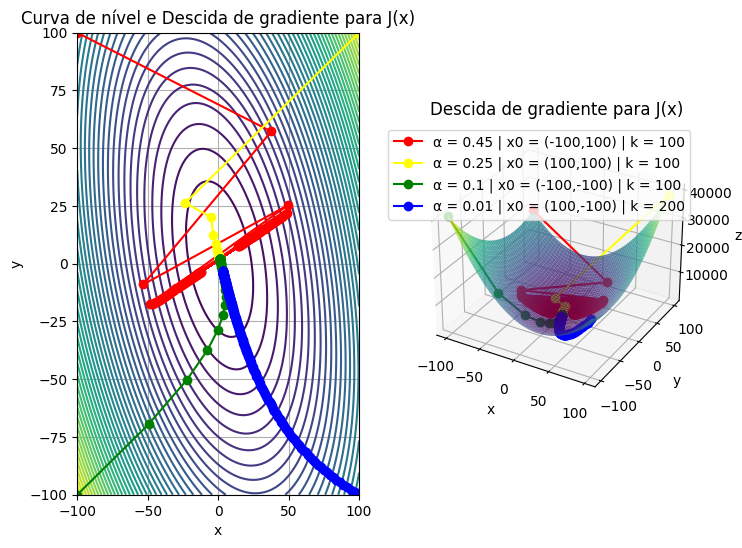

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C = np.array([1, 2])
A = np.array([[2, 0.5],
              [0.5, 1]])
b = np.array([5])

#   @brief: Retorna o gradiente de J(x)
def Grad(x):
    return (2 * np.dot(A, x - C))

#   @brief: Implementação do algoritmo
#     @params:
#        - x0: Ponto inicial
#        - alpha: Taxa de aprendizado
#        - K: Número de iterações
def GradientDescent(xk, yk, alpha, K):
    PointsHist = [[xk, yk, J([xk, yk])]]
    for k in range(K):
      gradiente = Grad([xk, yk])
      xk = xk - (alpha * gradiente[0])
      yk = yk - (alpha * gradiente[1])
      PointsHist.append([xk, yk, J([xk, yk])])
    return (np.array(PointsHist))

#   @brief: Plota a trajetória dos pontos que levaram até o mínimo da função
def PlotGradientDescent(x0, y0, alpha, K, Color, Label, ax, mood):
    PointsHist = GradientDescent(x0, y0, alpha, K)
    xk = PointsHist[:, 0]
    yk = PointsHist[:, 1]
    zk = PointsHist[:, 2]
    if mood == '2D':
      ax.plot(xk, yk, '-o', color=Color, label=Label)
    elif mood == '3D':
      ax.plot(xk, yk, zk, '-o', color=Color, label=Label)
      ax.legend()

def TestGradientDescent(ax, mood):
      PlotGradientDescent(-100, 100, 0.45, 100,
                          'red', 'α = 0.45 | x0 = (-100,100) | k = 100', ax, mood)

      PlotGradientDescent(100, 100, 0.25, 100,
                          'yellow', 'α = 0.25 | x0 = (100,100) | k = 100', ax, mood)

      PlotGradientDescent(-100, -100, 0.1, 100,
                          'green', 'α = 0.1 | x0 = (-100,-100) | k = 100', ax, mood)

      PlotGradientDescent(100, -100, 0.01, 200,
                          'blue', 'α = 0.01 | x0 = (100,-100) | k = 200', ax, mood)

#    @brief:
#    - add_subplot(): Cria uma "subimagem" dentro da figura
#    - plot_surface(): plota uma superfície 3D na figura (cmap=paletaDeCores)
def PlotSurface(fig):
    XYZ = GetSurface()
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(XYZ[0], XYZ[1], XYZ[2], cmap='viridis', alpha=0.8)
    TestGradientDescent(ax, '3D')
    ConfGraph3D(ax, 'x', 'y', 'z', 'Descida de gradiente para J(x)')

def PlotLevelCurve(fig):
  XYZ = GetSurface()
  ax = fig.add_subplot(1, 2, 1)
  plt.contour(XYZ[0], XYZ[1], XYZ[2], levels=50, cmap='viridis')
  TestGradientDescent(ax, '2D')
  ConfGraph2D(ax, 'x', 'y', 'Curva de nível e Descida de gradiente para J(x)')


def PlotFigure():
    fig = plt.figure(figsize=(8, 6))
    PlotLevelCurve(fig)
    PlotSurface(fig)

PlotFigure()

É possivel observar na prática como a trajetória até o ponto mínimo pode variar em funçãp  do valor de $\alpha$ e do ponto inicial $x_0$. No gráfico, são apresentados quatro caminhos que partem dos pontos extremos da função $J(x)$. Sobre as rotas em amarelo, verde e azul, é possível afirmar que todas alcançam o ponto mínimo. Enquanto a verde e amarela o fazem com mais eficiência, devido a ordem de grandeza da azul $(10^{-2})$, mais iterações são nescessárias (aproximadamente o dobro) e portanto mais poder de processamento é consumido no processo. Em contra partida, o trajeto descrito pela curva vermelha é nitidamente menos eficiente e diverge consideravelmente até convergir. Esse comportamento pode ser explicado devido a taxa de aprendizado de valor relativamente elevado que torna o passo em direção contrária ao gradiente muito grande.

Portanto, infere-se que $\alpha$ é uma constante externa muito importante no algoritmo. Ela define a velocidade com que o gradiente se aproxima do ponto mínimo. Dessa forma, é importante encontrar um valor adequado para $\alpha$ que permita uma convergência rápida, evitando oscilações e a divergência do algoritmo.



# Referências bibliográficas
[1] LEWIS, F.L.;VRABIE,D.L;SYRMOS,V.L. **Optimal Control**. 3ed. Wiley, 2012

[2] NOCEDAL, Jorge; WRIGHT, Stephen J. **Numerical Optimization**. 2. ed. New York:

